# Table of Contents

* [1. Machine Learning in Python](#scikit_learn_tut)
    * [Intro to Machine Learning](#intro_to-ml)
    * [Linear Regression](#linear_regression)
    * [Classification](#intro_classification)
* [2. Recommendation Engine with Neo4j](#neo4j_recommendations)
* [3. PyMC3](#pymc3_modeling)
    * [Linear Regresson](#pymc3_linear)
    * [ADVI](#advi)
    * [API-fying](#api_fying)
* [4. Hacking Kernels](#hacking_kernel)
* [5. DASK](#dask_tutorial)
* [6. Other things](#other_things)
* [7. Neo4J Building Recommendation Engines](#Neo4J)
* [8. Luigi Building Data Pipelines](#Luigi)
* [9. Introduction to Julia Language](#Julia)

<a id='scikit_learn_tut'></a>

# An Introduction to Machine Learning in Python

[PyData 2016 Scikit-Learn tutorial github](https://github.com/rasbt/pydata-chicago2016-ml-tutorial)

<a id='intro_to-ml'></a>

## Intro to Machine Learning

* Supervised: imitating previous classification
    * Regresssion: continuous input predicts continuous output
    * Classification: predicting categorical
* Unsupervised: finding/discovery of patterns
    * Clustering: finding groups of similar items
    * Compression: finding the structure to simplify the analysis
* Reinforcement: learning by doing

<a id='linear_regression'></a>

## Linear Regression

* Explanatory and response variable
* Machine learning used when matrix solving is not feasible
* scikit-learn: numpy for machine learning/algorithms
    * X array = features (columns), data points (rows)
    * Y array = store the continuous target variable corresponding to the data points

### Workflow

1) Split into training/test (70/30)

2) Hyperparameter values (meta-values about the algorithm) + Learning algorithm
    * Hyperparemeter = values of the algorithm, not the model- how many iterations, etc.

3) Test the model
    * Make predictions using the model
    * Compare prediction to actual output labels (model output to true labels)
    * Compute performance metrics

4) Re-create the model with all data
    * generally, the more data = better algorithm

### Code example of regression

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [4]:
#load in the data with pandas and look at what it seems like
df = pd.read_csv('../../pydata-chicago2016-ml-tutorial/code/dataset_brain.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


Notes:
- Head size = continuous variable
- Brain-weight = continuous variable

<b>Can the head size predict the brain-weight?</b>

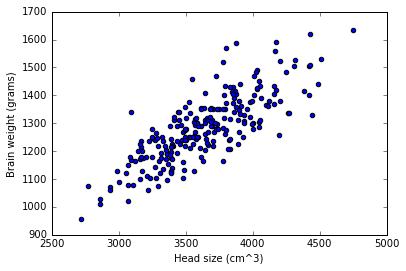

In [8]:
#look at whether or not it makes sense to build a model
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Preparing the dataset

In [11]:
#creating numpy arrays using the pandas array: y first- what we want to predict
y = df['brain-weight'].values
y.shape

(237,)

In [14]:
# another numpy array from pandas
X = df['head-size'].values
# we need to add a second axis to the array- scikit-learn expects it
X = X[:, np.newaxis]
X.shape

(237, 1)

Random state- the same random state will give you the same split. This is helpful for reproducibility.

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

In [16]:
X_train.shape

(165, 1)

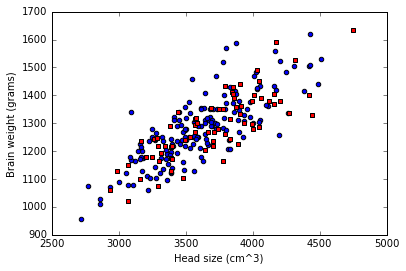

In [17]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [24]:
from sklearn.linear_model import LinearRegression

#initialize linear regression object
lr = LinearRegression()
#provide both x and y, because it's supervised learning
lr.fit(X_train, y_train)
#making predictings using the 'predict' method
y_pred = lr.predict(X_test)

### Evaluating the Model

We can use r2 score to evaluate the model: done manually

In [22]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.635


In [32]:
#check the the scikit-learn R2 with the one manually computed above
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.635


sklearn.metrics has a number of different ways to evaluate the fit of a model.

In [30]:
lr.coef_, lr.intercept_

(array([ 0.271117]), 302.03033196088086)

Use y = mx + b to plot the line below

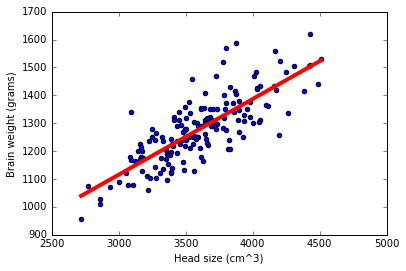

In [28]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

<a id ='intro_classification'></a>

## Understanding Classification

If we use train/test split funtion, we may not get a training set with the same proportion of things that are classified. We need to stratify the split, which is a relatively new feature of scikit-learn. 

In logistic regression, the activation function is a predicted probability, which is then converted to a unit step function, which then predicts the class label. 

Logistic regression is a generalized linear model that gets weight coefficients that we use to make predictions on new data.

K-nearest-neighbors looks up the samples in the neighborhood and makes the classification prediction based on the neareast neighbors. 

One thing to keep in mind: all features must be at the same scale. 

### The Iris dataset

In [5]:
df = pd.read_csv('../../pydata-chicago2016-ml-tutorial/code/dataset_iris.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
X = df.iloc[:, :4].values 
y = df['class'].values
#these are the unique values within y
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Class label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
# we want to convert the labels to integers (string to int)
l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

In [50]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Scikit-learn's in-build datasets

In [53]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Test/train splits

In [60]:
X, y = iris.data[:, :2], iris.target
# ! We only use 2 features for visual purposes (sepal length, width)

print('Class labels:', np.unique(y))
print('Class proportions:', np.bincount(y))

Class labels: [0 1 2]
Class proportions: [50 50 50]


In [64]:
#what happens if we just split without stratifying?
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [32 40 33]


In [66]:
# the stratify=y option makes sure that the data remains in a good distribution
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123,
        stratify=y)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [35 35 35]


### Logistic Regression

If you use the default setting, it will train three binary logistic regression classifiers, each one comparing 'one-vs-rest'. We use the [softmax function](https://en.wikipedia.org/wiki/Softmax_function) to do a multinomial classification. If the classes are independent, it's reasonable to use softmax.

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr.fit(X_train, y_train)
print('Test accuracy %.2f' % lr.score(X_test, y_test))

Test accuracy 0.80


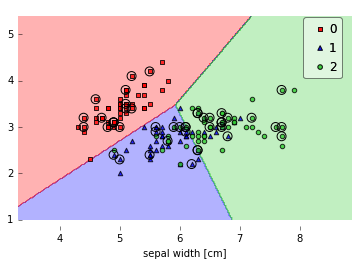

In [71]:
from mlxtend.evaluate import plot_decision_regions

plot_decision_regions

plot_decision_regions(X=X, y=y, clf=lr, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

[Resource for how to pick a model](http://scikit-learn.org/stable/model_selection.html#model-selection)

### K-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier

#how do you pick the number of neighbors?
#how to break a tie
kn = KNeighborsClassifier(n_neighbors=4)

kn.fit(X_train, y_train)
print('Test accuracy %.2f' % kn.score(X_test, y_test))

Test accuracy 0.82


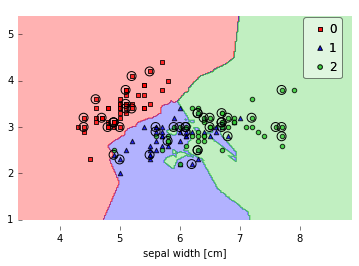

In [80]:
plot_decision_regions(X=X, y=y, clf=kn, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

<a id='feature_processing'></a>

## Feature Preprocessing & scikit-learn Pipelines

### Categorical features: nominal vs ordinal

Nominal variables have no intrinsic ordering, so we can binarize them. Ordinal variables can be coded with numbers.

Types of feature normalization: minmax just rescales from 0-1, and z-score centers things around the mean. Z-score standardization for simple optimization like gradient descent: weights are updated more equally. Z-score can optimize in both directions.

Re-scaling is done to to make sure that the coefficients the model puts out are representative of how important input variables are, rather than their magnitudes.

In [83]:
import pandas as pd

df = pd.DataFrame([
            ['green', 'M', 10.0], 
            ['red', 'L', 13.5], 
            ['blue', 'XL', 15.3]])

df.columns = ['color', 'size', 'prize']
df

,color,size,prize
0,green,M,10.0
1,red,L,13.5
2,blue,XL,15.3


Note to self: Look up what DictVectorizer does (QQQ)

In [84]:
from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer(sparse=False)

X = dvec.fit_transform(df.transpose().to_dict().values())
X

array([[  0. ,   1. ,   0. ,  10. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   1. ,  13.5,   1. ,   0. ,   0. ],
       [  1. ,   0. ,   0. ,  15.3,   0. ,   0. ,   1. ]])

In [85]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,prize
0,green,1,10.0
1,red,2,13.5
2,blue,3,15.3


In [86]:
X = dvec.fit_transform(df.transpose().to_dict().values())
X

array([[  0. ,   1. ,   0. ,  10. ,   1. ],
       [  0. ,   0. ,   1. ,  13.5,   2. ],
       [  1. ,   0. ,   0. ,  15.3,   3. ]])

### Normalization

In [87]:
df = pd.DataFrame([1., 2., 3., 4., 5., 6.], columns=['feature'])
df

,feature
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0


In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmxsc = MinMaxScaler()
stdsc = StandardScaler()

X = df['feature'].values[:, np.newaxis]

df['minmax'] = mmxsc.fit_transform(X)
df['z-score'] = stdsc.fit_transform(X)

df

,feature,minmax,z-score
0,1.0,0.0,-1.46385
1,2.0,0.2,-0.87831
2,3.0,0.4,-0.29277
3,4.0,0.6,0.29277
4,5.0,0.8,0.87831
5,6.0,1.0,1.46385


### Pipeline

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123,
        stratify=y)

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr_pipe = make_pipeline(StandardScaler(), lr)

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.9555555555555556

In [90]:
lr_pipe.named_steps

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=1, solver='newton-cg',
           tol=0.0001, verbose=0, warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [91]:
lr_pipe.named_steps['standardscaler'].transform(X[:5])

array([[-0.92257899,  1.04365194, -1.36204734, -1.33302226],
       [-1.17919036, -0.09310588, -1.36204734, -1.33302226],
       [-1.43580174,  0.36159725, -1.42034941, -1.33302226],
       [-1.56410743,  0.13424568, -1.30374528, -1.33302226],
       [-1.05088468,  1.2710035 , -1.36204734, -1.33302226]])

Things to look up (QQQ):

Model evaluation
- Repeated Holdout
- Bootstrapping
- Cross-validation

Visualization Classification results:
- It's hard to visualize things in higher dimensions

<a id='neo4j_recommendations'></a>

# Recommendation Engine with Neo4j

Things are done instead of indexing but through relationships.

- Uniqueness constraints also auto-index (label, property)

``` 
CREATE CONSTRAINT ON (t:Topic) ASSRT t.id IS UNIQUE
```
- Indexes are only used to find the starting point for queries
- Relational databases use index scans to look up rows in tables and join them with rows from other tables


How to run the neo4j guide from this tutorial
``` python
:play http://guides.neo4j.com/pydatachi
```        

- Indexes will be the starting point for recommendation traverses
- Need to install APOC (awesome procedures on Cypher)
- Can write stored procedures and drop into neo4j as a plugin
- There are implicit group by's in Cypher queries
- Assuming that things with the thing that has 'has_topic' relationship are topics
- Clustering topics

### Periodic Commit
- Cypher keeps all transaction state in memory when running a query 
- When using LOAD CSV, we can get an outofmemory exception
``` 
USING PERIODIC COMMIT [insert number here; default 1000]
LOAD CSV
```
- Happy medium tends to be 5K - 10K rows



The `WITH` clause allows chaining of query parts that are then passed to other `MATCH` clauses.
- Filter on aggregated values
- Separate reading from updating

[Topic Similarity Jupyter notebook](https://nbviewer.jupyter.org/github/neo4j-meetups/modeling-worked-example/blob/master/pydata/Neo4j%20recommendations.ipynb)

Look at this later (QQQ)

- Neo4j defaults to understanding everything as a string
- Imagine if we included event attendance in that algorithm
- Neo4j load csv is a transactional import; if something goes wrong, tie things together later

[Drawing neo4j stuff in Jupyter notebook](http://nicolewhite.github.io/neo4j-jupyter/hello-world.html)

<a id='pymc3_modeling'></a>

# PyMC3

[Github repository of pymc3 tutorial](https://github.com/parsing-science/pymc3_quickstart_guide)

- Set up models using with statmeent
- Can set up a burn-in preiod

- look for betas to be sharp
- what to look for in the plots?

<a id='pymc3_linear'></a>

## Linear Regression

- don't use Pandas dataframes with PyMC3
- Cast boolean as integer - PyMC3 doesn't like booleans
- PyMC3 needs to be numpy arrays
- if you don't specify a sampler, pymc3 will pick one for you
- betas look like they're in the right direction
- Cast all the variables with errors
- Instead of coming up with one single value for parameters, coming up with a value and know the error
- What if the beta changes over time?
- What is probabilistic programming

<a id='hierarchical_lr'></a>

## Hierarchical Linear/Logistic Regression

- [hierarchical linear regression intro](http://www.tqmp.org/RegularArticles/vol08-1/p052/p052.pdf)
- ADVI vs. MCMC (ADVI

<a id = 'advi'></a>

## ADVI (variational inference technique)

- black box that does parameter estimatino
- make sure that there are no NaNs and Infinities
- Can get an estimate of the distributions
- Can use a NUTS sampler with the standard deviations
- [ADVI vs. MCMC](http://arxiv.org/pdf/1506.03431v2.pdf)

<a id='api_fying'></a>

## API-fying

- can use posterier samples to predict
- even if you put in the wrong actual value, it'll predict something

<a id='hacking_kernel'></a>

# Hacking the Jupyter Kernels

[Slides for the talk are here](https://docs.google.com/presentation/d/1anOs5s9mSIeRBbuCaZMdi3CbAXef5eZxxMbla5c0Uqg/edit)

[Safia's twitter](https://twitter.com/captainsafia)

1. What is a kernel?
    * A program that runs and introspects the user's code
    * Tracks the state of the kernel itself
    * Essentially a communicator
    * Single kernel can be connected to multiple front-ends


2. What does `jupyter notebook` do?
    * Starts a kernel + passes a connection file that defines how it should communicate to the front-end
    * Kernel + front-end communicate through JSON payloads

3. What does a connetion file look like?
```javascript
{
  "control_port": 50160,
  "shell_port": 57503,
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "stdin_port": 52597,
  "hb_port": 42540,
  "ip": "127.0.0.1",
  "iopub_port": 40885,
  "key": "a0436f6c-1916-498b-8eb9-e81ab9368e84"
}
```

### How do we write a kernel for Jupyter?
1. Write it in Python
    * ipykernel provides all objects that you need to overwrite all standard python functions
    * There has to be a repl (repl console system) using pexpect
2. Write the kernel in the native language

<b> Jupyter messaging protocol </b>

1. Defines the spec for how messages look between front-end and kernel 

```javascript
{ 
'header' : {  
'msg_id' : uuid,
      	'username' : str,
       'session' : uuid,
       'date': str,
       'msg_type' : str,
       'version' : '5.0',
  	},
  	'parent_header' : dict,
 	'metadata' : dict,
  	'content' : dict,
}
```
2. Types of kernel sockets
    * Shell
        - Managing communication with all of the frontends
        - Request-reply pattern
        - sending to that port to that socket to the kernel, parsing the message, and sending the message back.
```javascript
{ 
'header' : {  
'msg_id' : uuid,
      	'username' : str,
       'session' : uuid,
       'date': str,
       'msg_type' : ‘is_complete_request’,
       'version' : '5.0',
  	},
  	'parent_header' : dict,
 	'metadata' : dict,
  	'content' : {
		‘code’: ‘prin’
}
}
```   

example: tab-complete
        - <b>use casess</b>
        - statement completeness
        - tab completion
        - information about the connected kernel
        - send out requests to execute code
    * IO Publication
        - any kind of image rendering
        - provides information about current kernel state (live/dead)
        - streams output that are side effects of execution
    * Standard Input
        - when the kernel wants to request input from the front end
        - executing python code asking for raw_input
    * Control
        - Does everything that the shell can do
        - Can trump things in the queue
        - restarting the kernel in the middle of execution is done by control socket
    * Heartbeat
        - Sends bytestring back and forth
        - Used to make sure the kernel is still alive
    

### What makes this magic happen?

`0MQ` is a messaging library that provides an API that has bindings across programming langauges to open up communication. 

An agreement on how messages should be sent.

Random notes:
- Banner: what is printed out when your kernel is connected in console mode.
- code_mirror- what type of syntax highlighting
- Execution count makes a call to another function called "start bash"
- the do_execute tells what to do with the code
- kernel base class only handles do_execute. can write do_complete

[A fill-in-the-blank version of how to build a kernel](https://gist.github.com/captainsafia/c86c163218090fe6134fac7aa0248d82)

<a id='dask_tutorial'></a>

# Parallel Computing with Dask

[Speaker](https://twitter.com/jseabold)

[Repo](https://github.com/jseabold/dask-pydata-chi-2016)


<b>Dask</b>:
- Parallel numpy and pandas
- Responsive
- Parallel programming + Task scheduling
- It's a data structure on top of a bunch of numpy arrays
- Does opportunistic cacheing 
- Number of chunks is arbitrary
- dask.get() is an alias for the synchronous backend for tracebacks
- Thread is the smallest unit
- io tasks are not blocked by the GIL
- Learn more about Tornado in python
- Can do pandas dataframes distributed
- Can build up arbitrarily complex things
- h5py (hierarchical data format)
    * fast lookups
- Dask bag
    * bag take is like head
    * don't use groupby unless you have to
- head is not lazy for a df in dask
- There's a map_blocks for dask arrays

<a id='other_things'></a>

# Talks I didn't attend (but things I want to look into)

[Luigi](https://media.readthedocs.org/pdf/luigi/latest/luigi.pdf)

[Luigi 1](http://help.mortardata.com/technologies/luigi/how_luigi_works)

[Luigi 2](https://marcobonzanini.com/2015/10/24/building-data-pipelines-with-python-and-luigi/)

[Luigi docs](https://media.readthedocs.org/pdf/luigi/latest/luigi.pdf)

[Julia in the cloud](https://juliabox.com/)


# JUSTIN'S NOTES

<a id='neo4J'></a>

## Building Recommendation Enginers With Neo4j:
:play http://guides.neo4j.com/pydatachi

-Use link above in Neo4j for full tutorial
-Some links might have file instead of url address, change those!
-“WITH” clause allows chaining of arguments in Neo4J



<a id='Luigi'></a>

## Luigi and Data Piplines
####  no link given to repo used or slides!

github.com/spotify/luigi
- Luigi is a Python module that helps you build complex pipelines of batch jobs. It handles dependency resolution, workflow management, visualization etc. It also comes with Hadoop support built in.
- Works with slack and other chat: https://github.com/houzz/hubot-luigi

- Basic structure is built around Tasks & Targets
Tasks: atomic unit of work. Takes a target(s), produces targets)
Targets: ..... slide moved too fast	
- It seems like LUIGI is made to tie together different functions, tasks, jobs, etc. : it is a framework for scripts tied together
- Has both command line interface and GUI interface
- Speaker used building permit data from City of Chicago: https://data.cityofchicago.org



<a id='Julia'></a>

## JULIA
#### talk by: Huda Nassar @nassarhuda
#### Tutorial: clone git@github.com:nassarhuda/PyDataChi2016.git
- download the language here: http://julialang.org/downloads/
- run code in the cloud, including code from github https://juliabox.com

- Need to correct this error to load some datasets https://github.com/JuliaLang/julia/issues/14746

- Able to select options to do things in parallel
- Able to change methods to increase speed
- Typed like python for the most part
- “Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments. It provides a sophisticated compiler, distributed parallel execution, numerical accuracy, and an extensive mathematical function library”
- Julia's goal: write like Python, run like C, easily access existing libraries and legacy code. (more here)
- Julie packages - http://pkg.julialang.org
- JULIA interface with AWS - https://github.com/JuliaCloud/AWS.jl
- Benefit of JULIA = easy to bring in packages from other languages
- Benefit of JULIA = easy to change type and sometimes possible to change assumptions of what types funtions or modules need
- “Don’t be afraid of doing a for loop in Julia, they can be faster than vectorized operations that you might go to for speed in python”
- Something about self-generated types… .that you can change on the fly with short-cuts?
- There was a short-cut to show you the code behind the functions being called, down to maybe machine code? Or at least C?
- PyCall is one of the most popular packages in Julia as it can run any python code or almost any python code in Julia.
- Interesting data frames syntax in Julia that, at least in places, seem a bit more straight forward than Pandas? See DataFrames_example Jupyter Notebook


